### Our aim to create regression models to predict the Medical Expenses of insurance companies. The medical expense is dependent on various factors like number of children, age, smoker, bmi, region of stay. This dataset represents the 4 corners of the United States.

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [103]:
df = pd.read_csv(r"D:\archive (40).zip")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [104]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [105]:
df.shape

(1338, 7)

In [106]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [108]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


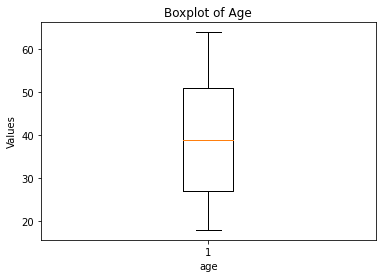

In [109]:
# Creating the boxplot for the "Age" column,in order to check for distribution and outliers
column = "age"
plt.boxplot(df[column])
plt.title("Boxplot of Age")
plt.xlabel(column)
plt.ylabel("Values")

plt.show()

### No outliers are seen on the boxplot and the median is in the senter of the distance between Q1 and Q3. 

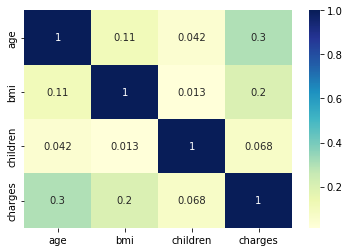

In [110]:
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [112]:
average_cost_by_region = df.groupby('region')['charges'].mean()
print(average_cost_by_region)

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64


### We don't see any real coorelations between the features, positive or negative.

In [42]:
# We will rename some of the columns to better understand the meaning of the data.
df.rename(columns={'region': 'region of USA', 'charges': 'cost of care'}, inplace=True)

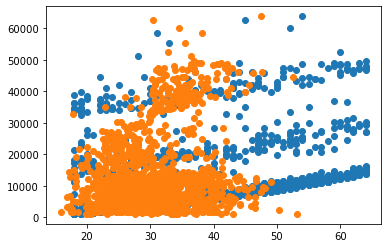

In [43]:
plt.scatter(df['age'], df["cost of care"]) # Blue
plt.scatter(df['bmi'], df["cost of care"])# Orange

### Not a clear relationship between BMI and Cost of Care in this model. Age does show a positive relationship with Cost of Care.

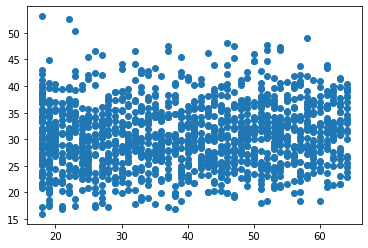

In [44]:
plt.scatter(df['age'], df['bmi'])

### The positive relationship with a value of + 0.11, which was recorded on the heatmap as well as the interpretation of this graph make it clear that there is no clear relationship between Age and BMI in this dataset

### There are no null columns so no need to deal with nan values but we will need to encode the categorical columns.

In [46]:
# Now we will label encode the sex column and the smoker column.
column_to_encode = "sex" 

df[column_to_encode] = df[column_to_encode].map({"female": 1, "male": 0})

print(df[column_to_encode])
df.head()

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    1
1335    1
1336    1
1337    1
Name: sex, Length: 1338, dtype: int64


,age,sex,bmi,children,smoker,region of USA,cost of care
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [47]:
# Now for the Smoking column
column_to_encode = "smoker" 

df[column_to_encode] = df[column_to_encode].map({"yes": 1, "no": 0})

print(df[column_to_encode])
df.head()

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64


,age,sex,bmi,children,smoker,region of USA,cost of care
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [48]:
# Lastly we need to One Hot Encode the Region of USA column.  
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
encoded_data = encoder.fit_transform(df['region of USA'])
r
categories = encoder.classes_

df_encoded = pd.DataFrame(data=encoded_data, columns=categories)

In [49]:
df2 = pd.concat([df, df_encoded], axis=1).drop("region of USA", axis=1)
print(df2)

      age  sex     bmi  children  smoker  cost of care  northeast  northwest  \
0      19    1  27.900         0       1   16884.92400          0          0   
1      18    0  33.770         1       0    1725.55230          0          0   
2      28    0  33.000         3       0    4449.46200          0          0   
3      33    0  22.705         0       0   21984.47061          0          1   
4      32    0  28.880         0       0    3866.85520          0          1   
...   ...  ...     ...       ...     ...           ...        ...        ...   
1333   50    0  30.970         3       0   10600.54830          0          1   
1334   18    1  31.920         0       0    2205.98080          1          0   
1335   18    1  36.850         0       0    1629.83350          0          0   
1336   21    1  25.800         0       0    2007.94500          0          0   
1337   61    1  29.070         0       1   29141.36030          0          1   

      southeast  southwest  
0         

In [50]:
df2.shape 

(1338, 10)

## Now lets get ready to perform Train_Test_Split.

In [52]:
from sklearn.model_selection import train_test_split
new_data = df2
X = new_data.drop('cost of care', axis=1)
y = new_data['cost of care']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .20, random_state=42)

### Time for scaling.

In [54]:
#Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [55]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [57]:
# Select the LR model and KFolds parameters
model = LinearRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=42)


In [58]:
# Initialize an array to store the performance metric (e.g., mean squared error) for each fold
mse_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)

    predictions = model.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    mse_scores.append(mse)

average_mse = np.mean(mse_scores)

print(f'Mean Squared Error for each fold: {mse_scores}')
print(f'Average Mean Squared Error: {average_mse}')


Mean Squared Error for each fold: [33596915.85136147, 37439620.22608732, 33451562.85551283, 41559312.10772008, 38946008.536686346]
Average Mean Squared Error: 36998683.9154736


In [59]:
# Perform cross-validation and evaluate the model
mse_scores = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
average_mse = np.mean(mse_scores)

print(f'Mean Squared Error for each fold: {mse_scores}')
print(f'Average Mean Squared Error: {average_mse}')

# Convert negative mean squared errors to positive and take the average
rmse_scores = np.sqrt(mse_scores)
average_rmse = np.mean(rmse_scores)

print(f'Cross-validated RMSE scores: {rmse_scores}')
print(f'Average RMSE: {average_rmse}')

Mean Squared Error for each fold: [33596915.85136147 37439620.22608732 33451562.85551283 41559312.10772008
 38946008.53668635]
Average Mean Squared Error: 36998683.9154736
Cross-validated RMSE scores: [5796.28465928 6118.79238299 5783.73260581 6446.65123205 6240.67372458]
Average RMSE: 6077.226920941315


### The RMSF scores averaged around 6000 and will be used as a starting point to compare the models.

In [61]:
# Select the LR model and KFolds parameters
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [62]:
mse_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)

    predictions = model.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    mse_scores.append(mse)

average_mse = np.mean(mse_scores)

print(f'Mean Squared Error for each fold: {mse_scores}')
print(f'Average Mean Squared Error: {average_mse}')


Mean Squared Error for each fold: [129411489.93355128, 131999489.55989468, 141254675.287666, 108526241.98561902, 140517152.64027184]
Average Mean Squared Error: 130341809.88140056


In [64]:
# Perform cross-validation and evaluate the model
mse_scores = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
average_mse = np.mean(mse_scores)

print(f'Mean Squared Error for each fold: {mse_scores}')
print(f'Average Mean Squared Error: {average_mse}')

# Convert negative mean squared errors to positive and take the average
rmse_scores = np.sqrt(mse_scores)
average_rmse = np.mean(rmse_scores)

print(f'Cross-validated RMSE scores: {rmse_scores}')
print(f'Average RMSE: {average_rmse}')

Mean Squared Error for each fold: [1.29411490e+08 1.31999490e+08 1.41254675e+08 1.08526242e+08
 1.40517153e+08]
Average Mean Squared Error: 130341809.88140056
Cross-validated RMSE scores: [11375.91710297 11489.103079   11885.06101321 10417.59290746
 11853.99310951]
Average RMSE: 11404.333442428977


### The KNN model performed worse than linear regression. We tried KNN since there were few features.

In [71]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
#model = PolynomialFeatures(degree=2, include_bias=False)
#kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [73]:
# Create a polynomial regression model pipeline
def polynomial_regression(degree):
    return make_pipeline(PolynomialFeatures(degree=degree, include_bias=False), LinearRegression())

# Specify the degree of the polynomial
degree = 2

model = polynomial_regression(degree)
model.fit(X_train, y_train)

test_score = model.score(X_test, y_test)
print(f'Test Set R-squared Score: {test_score}')

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, scoring='r2', cv=kf)
print(f'Cross-Validation R-squared Scores: {cv_scores}')
print(f'Mean Cross-Validation R-squared Score: {np.mean(cv_scores)}')

Test Set R-squared Score: 0.8665830903164844
Cross-Validation R-squared Scores: [0.86658309 0.83828256 0.87476278 0.76557829 0.83141841]
Mean Cross-Validation R-squared Score: 0.8353250254566685


### These results are better than linear regression, lets look at L1 and L2 regression.

In [99]:
from sklearn.linear_model import Lasso, 
from sklearn.metrics import r2_score
degree = 2
alpha = 25.5  
model = make_pipeline(PolynomialFeatures(degree=degree, include_bias=False), Lasso(alpha=alpha))

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculate R-squared on the test set
r2 = r2_score(y_test, y_pred)
print(f'R-squared Score on Test Set: {r2}')


R-squared Score on Test Set: 0.8687218116781019


### Higher score than just polynomial regression, that was 83%.

In [90]:
from sklearn.linear_model import Ridge
degree = 2
alpha = 0.5  
model = make_pipeline(PolynomialFeatures(degree=degree, include_bias=False), Ridge(alpha=alpha))

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f'R-squared Score on Test Set: {r2}')

R-squared Score on Test Set: 0.8665824411390384


### Slightly lower than L1 but really close, fine tuning each of these regularization models got these two models very close.

## In Conclusion:

### The costs of care averaged out cost about the same across all regions in this model, although we don't know what the condition they were treated for was or the therapy used. Our Lasso model gave the best performance for prediction at 87%. We could build an ANN in the future, which we do, and get a score of 99.8%.  